In [1]:
from fptools import fp, stochastic, bayes
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

In [2]:
?fp.make_sys

In [5]:
ex1rates = """partial, instrument, 1.0
instrument, partial, 1.0
partial, modifier, 1.0
modifier, partial, 1.0
instrument, instabs, 1.0
modifier, modabs, 1.0
"""
_, _, _, W, T, A, _, _ = fp.make_sys(ex1rates)
print(W, T, A)

[[-10.   5.   5.   0.   0.]
 [  5. -10.   0.   0.   0.]
 [  5.   0. -10.   0.   0.]
 [  0.   5.   0.  -0.   0.]
 [  0.   0.   5.   0.  -0.]] [[-10.   5.   5.]
 [  5. -10.   0.]
 [  5.   0. -10.]] [[0. 5. 0.]
 [0. 0. 5.]]


In [6]:
p0 = np.array([1.0, 0, 0])
print('mean: {}, variance: {}'.format(*np.round(fp.meanvar(T, p0), 6)))

mean: 0.4, variance: 0.12


In [10]:
stoch = stochastic.rep_ssa(W, n=2000)

Running 2000 stochastic simulations until absorbtion


100%|██████████| 2000/2000 [00:00<00:00, 7540.29it/s]


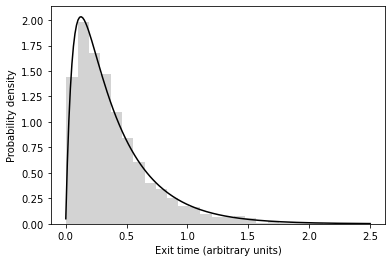

In [18]:
tvec = np.linspace(0.001, 2.5, 200)
plt.figure(figsize=(6, 4))
plt.plot(tvec, [fp.etd(t, T, A, p0) for t in tvec], 'k')
plt.hist(stoch['fpt'], density=True, bins=25, color='lightgrey')
plt.xlabel('Exit time (arbitrary units)')
plt.ylabel('Probability density')
plt.savefig('ex1etd.pdf')
plt.show()

In [19]:
# Getting mode
tvec[np.argmax([fp.etd(t, T, A, p0) for t in tvec])]

0.1265778894472362

In [21]:
# splitting probabilites
fp.splittingprobabilities(T, A, p0)

array([0.5, 0.5])

In [24]:
# Changing the transition rates to prefer the modifier parse
ex1ratesa = """partial, instrument, 1.0
instrument, partial, 1.0
partial, modifier, 2.0
modifier, partial, 1.0
instrument, instabs, 1.0
modifier, modabs, 2.0
"""
_, _, _, Wa, Ta, Aa, _, _ = fp.make_sys(ex1ratesa)
print(Wa, Ta, Aa)

[[-15.   5.   5.   0.   0.]
 [  5. -10.   0.   0.   0.]
 [ 10.   0. -15.   0.   0.]
 [  0.   5.   0.  -0.   0.]
 [  0.   0.  10.   0.  -0.]] [[-15.   5.   5.]
 [  5. -10.   0.]
 [ 10.   0. -15.]] [[ 0.  5.  0.]
 [ 0.  0. 10.]]


In [60]:
print('mean (instrument): {}, mean (modifier): {}'.format(*np.round(fp.cmfpt(Ta, Aa, p0), 6)))
fp.splittingprobabilities(Ta, Aa, p0)

mean (instrument): 0.260606, mean (modifier): 0.227273


array([0.27272727, 0.72727273])

In [61]:
stocha = stochastic.rep_ssa(Wa, n=2000)
stocha.head()

Running 2000 stochastic simulations until absorbtion


100%|██████████| 2000/2000 [00:00<00:00, 7386.67it/s]


,fpt,absstate
0,0.321126,4
1,0.101070,3
2,0.074187,4
3,0.352977,4
4,0.020976,4


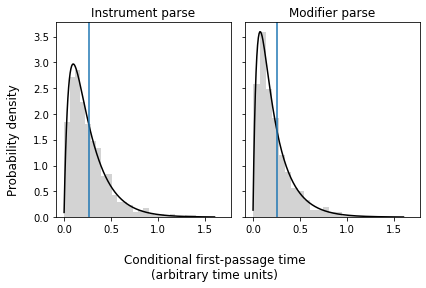

In [66]:
fig, axs = plt.subplots(1,2, sharex=True, sharey=True, squeeze=True, figsize=(6,4))
tvec = np.linspace(0.001, 1.6, 200)
condnames = ['Instrument parse', 'Modifier parse']
for i in range(2):
    axs.flat[i].plot(tvec, [fp.cfptd(t, Ta, Aa, p0)[i] for t in tvec], 'k')
    axs.flat[i].hist(stocha.loc[stocha['absstate']==i+3]['fpt'], density=True, bins=25, color='lightgrey')
    axs.flat[i].set_title(condnames[i])
    axs.flat[i].axvline(fp.cmfpt(Ta, Aa, p0)[0])
fig.supxlabel('Conditional first-passage time\n(arbitrary time units)')
fig.supylabel('Probability density')
fig.tight_layout()
fig.savefig('ex1cfptd.pdf')
plt.show()

In [57]:
?fp.cmfpt